Show how to build and save informations of **ONE** microtubule.

In [1]:
%matplotlib inline

from pathlib import Path
import sys
sys.path.append("../../")

import anamic

import numpy as np
import matplotlib.pyplot as plt

../../anamic/transformations.py:1916: UserWarning: No module named 'anamic._transformations'
  warnings.warn(str(err))


In [2]:
n_pf = 13
mt_length_nm = 1500  # nm
taper_length_nm = 0  # nm

labeling_ratio = 0.1
pixel_size = 110  # nm/pixel
image_offset = 800  # nm
noise_factor = 10
psf_size = 135

ms = anamic.simulator.mt_builder(n_pf, mt_length_nm, taper_length_nm)
ms.build_positions(apply_random_z_rotation=True, show_progress=True)
ms.label(labeling_ratio=labeling_ratio)
ms.project()
ms.random_rotation_projected()

ms.discretize_position(pixel_size=pixel_size, x_offset=image_offset, y_offset=image_offset)
ms.convolve(psf_size=psf_size, noise_factor=noise_factor)

#ms.save_positions("/home/hadim/test.csv")
#ms.save_metadata("/home/hadim/md.json")
#ms.save_image("/home/hadim/md.tif")

100%|██████████| 187/187 [00:01<00:00, 120.81it/s]


In [3]:
# Show 3D position
_ = ms.show_positions(size=0.4, color_feature_name='pf')

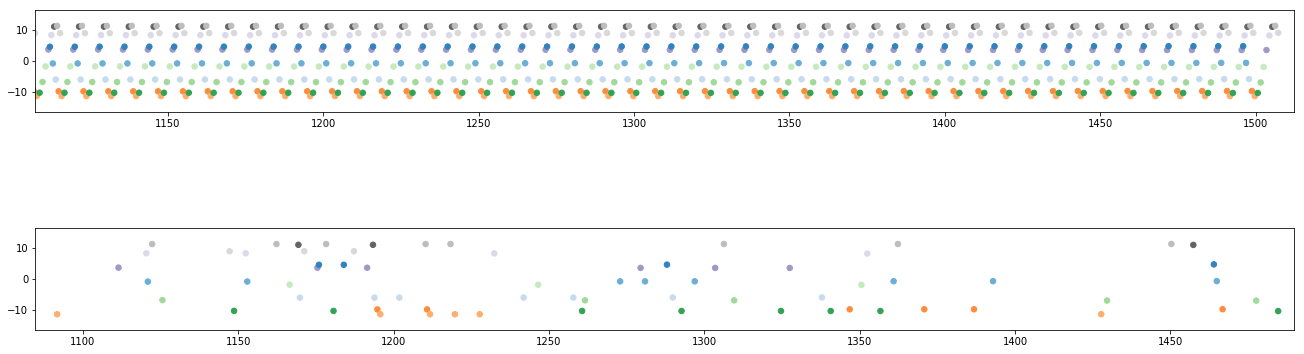

In [4]:
# Show projected 2D positions
_ = ms.visualize_2d_positions('x_proj', 'y_proj', show_all=True, show_labeled=True,
                              color_feature='pf', marker_size=30, x_offset=400)

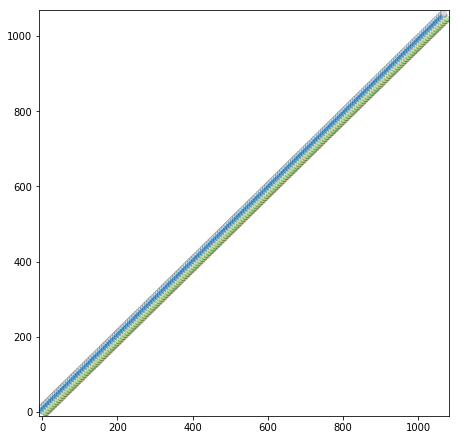

In [5]:
# Show projected 2D positions after rotation
_ = ms.visualize_2d_positions('x_proj_rotated', 'y_proj_rotated', show_all=True, show_labeled=False,
                              color_feature='pf', marker_size=20, x_offset=0)

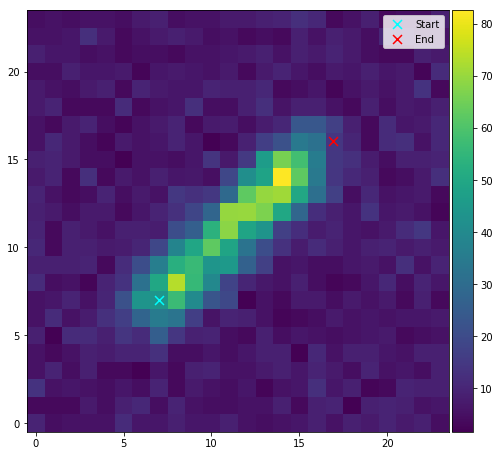

In [6]:
# Show final generated image
ms.show_image(tip_marker_size=80)